https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [343]:
import pandas as pd

In [344]:
df = pd.read_csv('data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [346]:
# unicos
df['week'].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [347]:
# valores
df['week'].values

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun',
       'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'We

In [348]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['week'] = le.fit_transform(df['week'])
# df['week'].values


In [349]:
# dummies
df1 = pd.get_dummies(df['week'])
df1

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
343,0,0,0,0,0,1,0
344,0,0,0,0,0,0,1
345,0,0,0,0,1,0,0
346,1,0,0,0,0,0,0


In [350]:
# df1.rename(columns={0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})

In [351]:
df = pd.concat([df, df1], axis=1)
df = df.drop(columns='week')
df


,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


In [352]:
# agurpar por mes y quedarse con la media de la columna temp_1
df2 = df.groupby('month', as_index=False)[['temp_1']].mean()
df2


,month,temp_1
0,1,49.677419
1,2,54.115385
2,3,56.483871
3,4,66.433333
4,5,68.838710
5,6,73.233333
6,7,76.225806
7,8,77.947368
8,9,70.428571
9,10,63.900000


In [353]:
# merge del dataframe anterior con el original
df = pd.merge(df, df2, on='month')
df.head(40)

,year,month,day,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,Fri,Mon,Sat,Sun,Thurs,Tues,Wed,temp_1_y
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0,49.677419
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0,49.677419
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0,49.677419
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0,49.677419
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0,49.677419
5,2016,1,6,40,44,46.1,51,43,49,48,40,0,0,0,0,0,0,1,49.677419
6,2016,1,7,44,51,46.2,45,45,49,46,38,0,0,0,0,1,0,0,49.677419
7,2016,1,8,51,45,46.3,48,43,47,46,34,1,0,0,0,0,0,0,49.677419
8,2016,1,9,45,48,46.4,50,46,50,45,47,0,0,1,0,0,0,0,49.677419
9,2016,1,10,48,50,46.5,52,45,48,48,49,0,0,0,1,0,0,0,49.677419


In [354]:
import seaborn as sns

In [355]:
import matplotlib.pyplot as plt

### 3. Divide en train y test

In [356]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='actual', axis=1)

y = df['actual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


### 4. Entrena el modelo


In [357]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [358]:
X_train.columns

Index(['year', 'month', 'day', 'temp_2', 'temp_1_x', 'average',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'Fri',
       'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed', 'temp_1_y'],
      dtype='object')

In [359]:
dtr.feature_importances_

array([0.        , 0.01599532, 0.02361068, 0.01095776, 0.7499136 ,
       0.09564108, 0.00983198, 0.01827649, 0.03357845, 0.01921523,
       0.00799958, 0.00279093, 0.00311522, 0.00140077, 0.00085538,
       0.00226317, 0.00203262, 0.00252173])

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [360]:
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error ,mean_squared_error, r2_score
# import numpy as np

# print("MAE: ", mean_absolute_error(y, predictions))
# print("MAPE: ", mean_absolute_percentage_error(y,predictions)) # Es el complemento del R2
# print("MSE: ", mean_squared_error(y,predictions))
# print("RMSE: ", np.sqrt(mean_squared_error(y,predictions))) #es el mas/menos en la misma unidad que el target
# print("R2: ", r2_score(y,predictions))

In [361]:
y_pred = dtr.predict(X_test)
y_pred

array([77., 59., 52., 64., 72., 63., 75., 74., 68., 71., 68., 67., 39.,
       68., 68., 55., 63., 57., 55., 68., 61., 55., 70., 68., 63., 48.,
       71., 45., 51., 80., 81., 62., 57., 85., 73., 68., 49., 54., 67.,
       35., 63., 60., 77., 44., 62., 75., 55., 85., 54., 39., 45., 44.,
       63., 66., 74., 61., 55., 64., 55., 63., 63., 49., 60., 68., 60.,
       53., 68., 68., 80., 39., 75., 63., 57., 48., 49., 68., 49., 74.,
       48., 48., 54., 89., 71., 66., 75., 55., 45.])

In [362]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2: ", r2_score(y_test,y_pred))

Coeficiente determinación 0.6097194407815985
MAE 5.563218390804598
MAPE 0.08606201974950067
MSE 54.275862068965516
RMSE 7.367215353779575
R2:  0.6097194407815985


### 6. Representa el árbol de decision

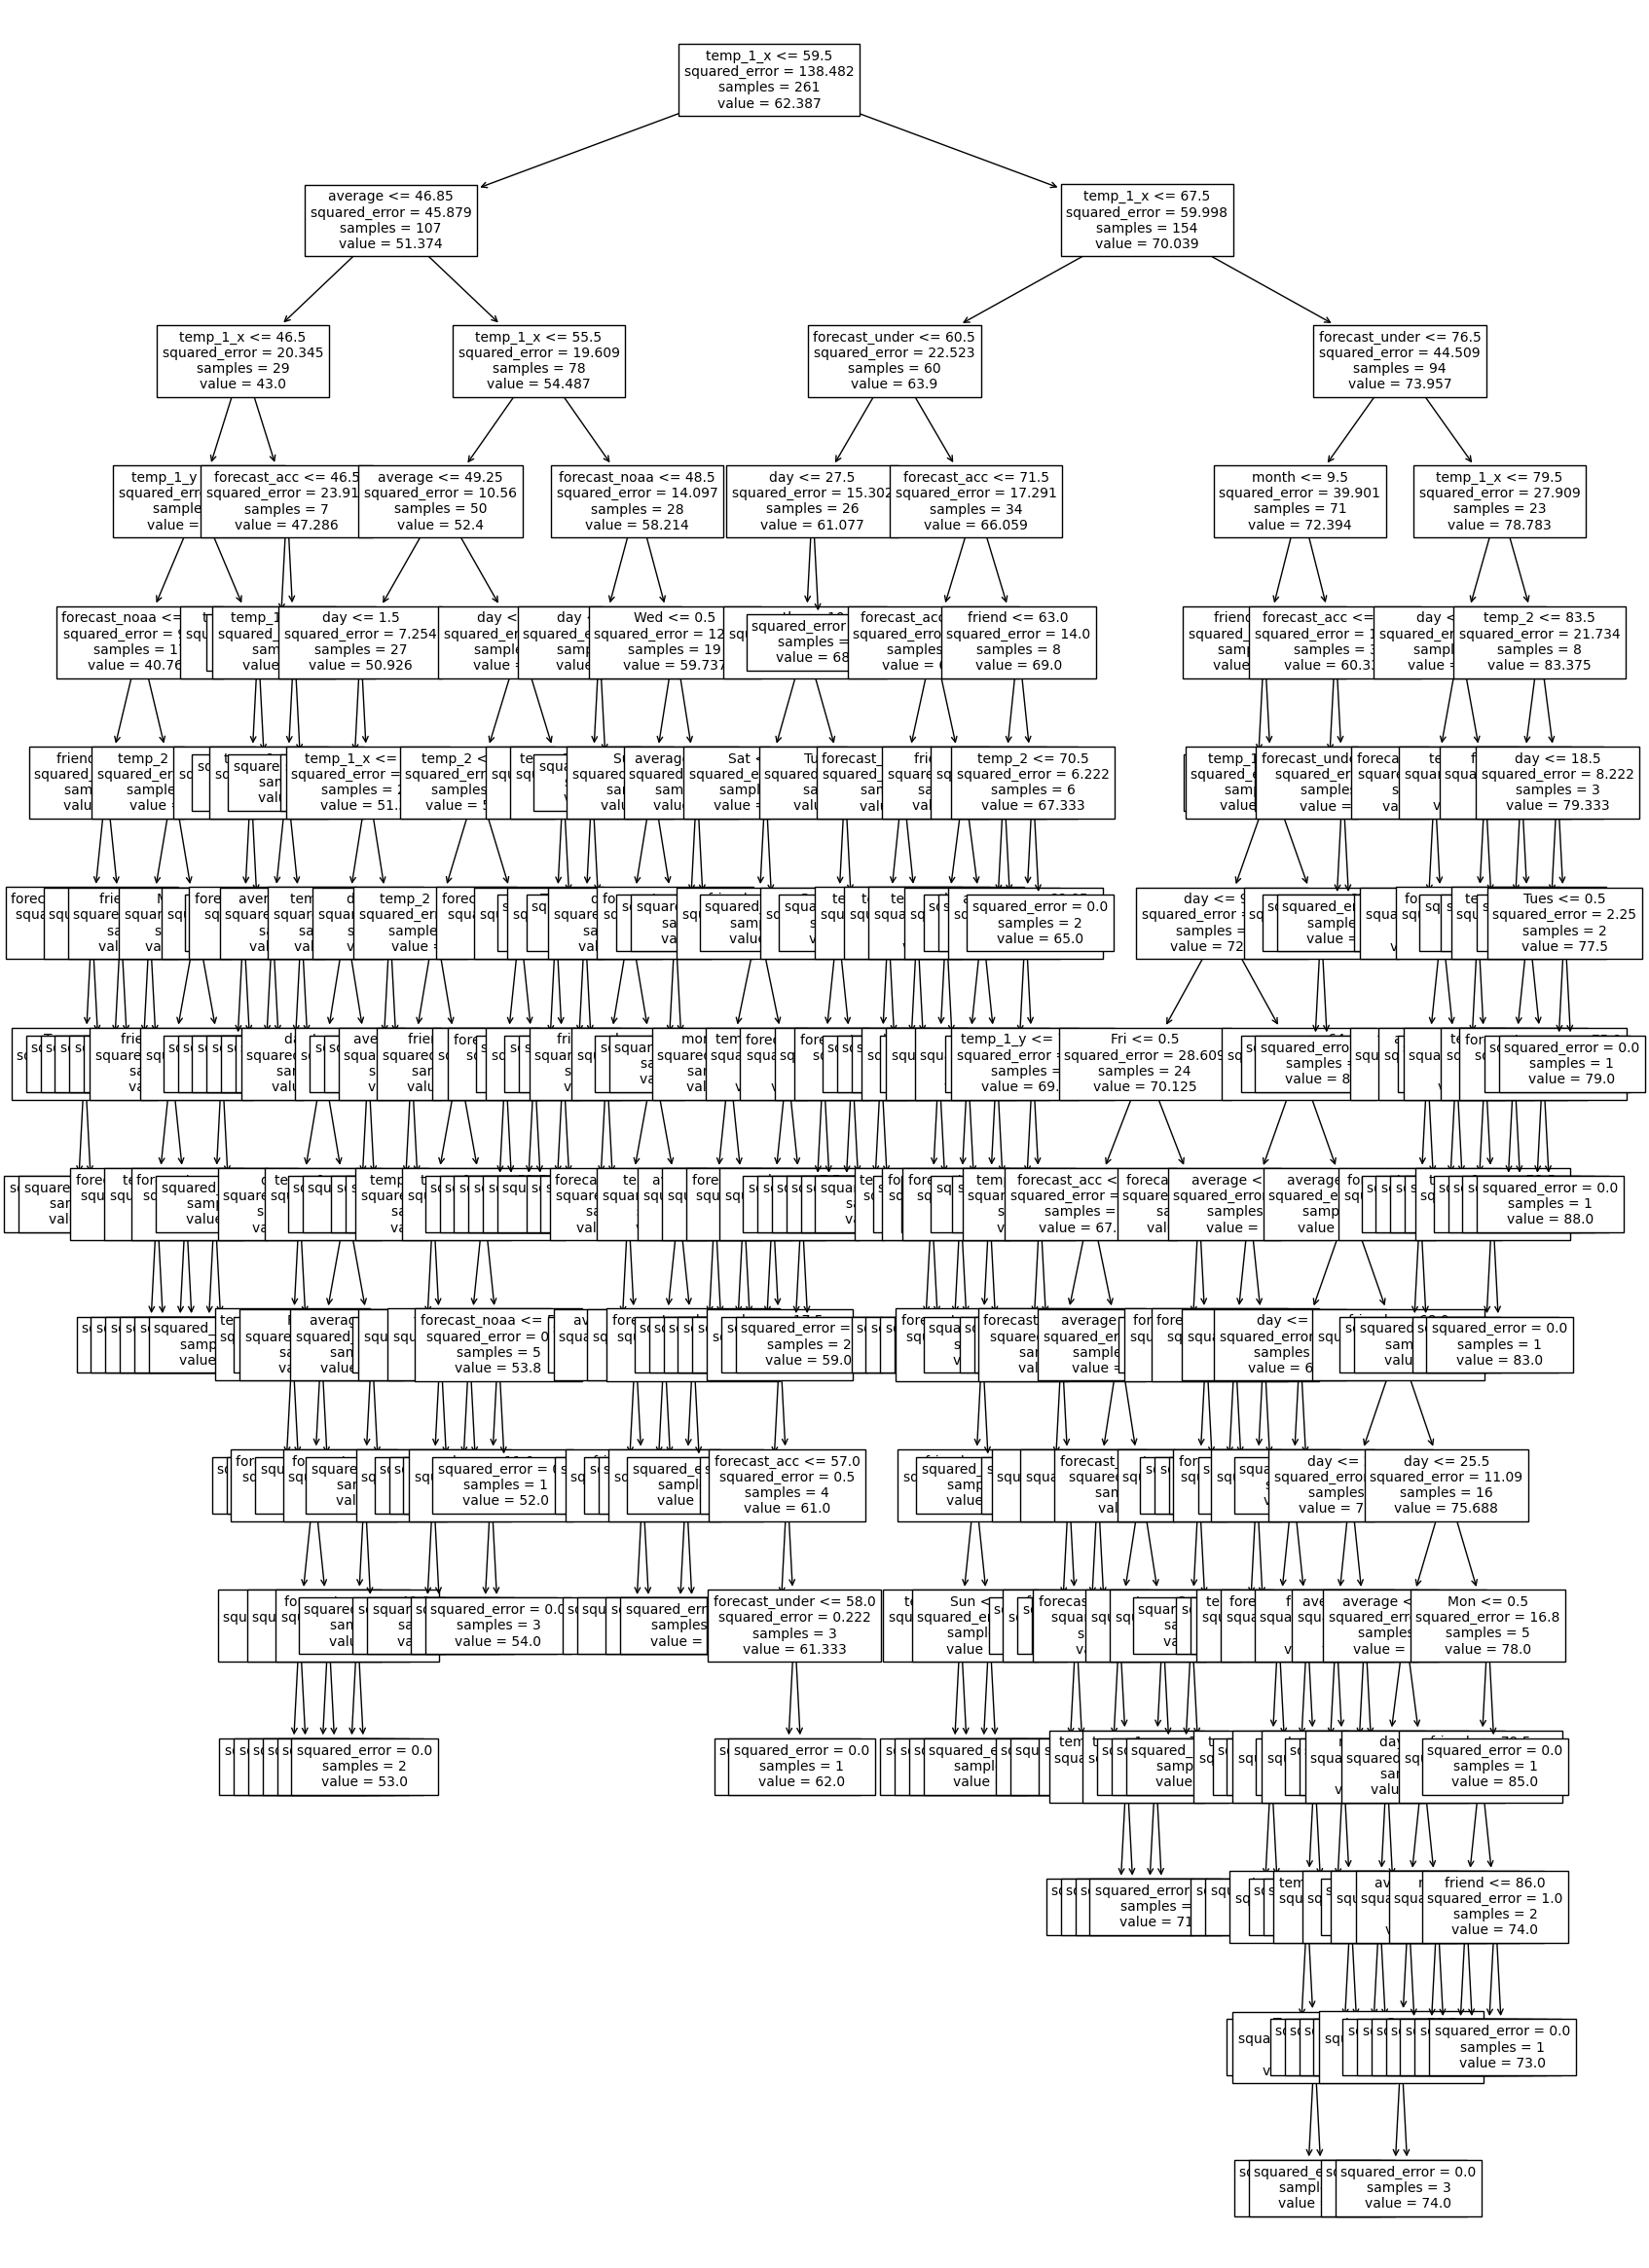

In [363]:
plt.figure(figsize=(20,30))

plot_tree(dtr, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [364]:
dtr_3 = DecisionTreeRegressor(max_depth=3)
dtr_3.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

### 8. Vuelve a evaluar tu modelo

In [365]:
y_pred = dtr_3.predict(X_test) 
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

Coeficiente determinación 0.7726618872154287
MAE 4.298171655733802
MAPE 0.06757892776598018
MSE 31.615646132169775
RMSE 5.622779217804108
R2: 0.7726618872154287


### 9. Vuelve a representar su árbol

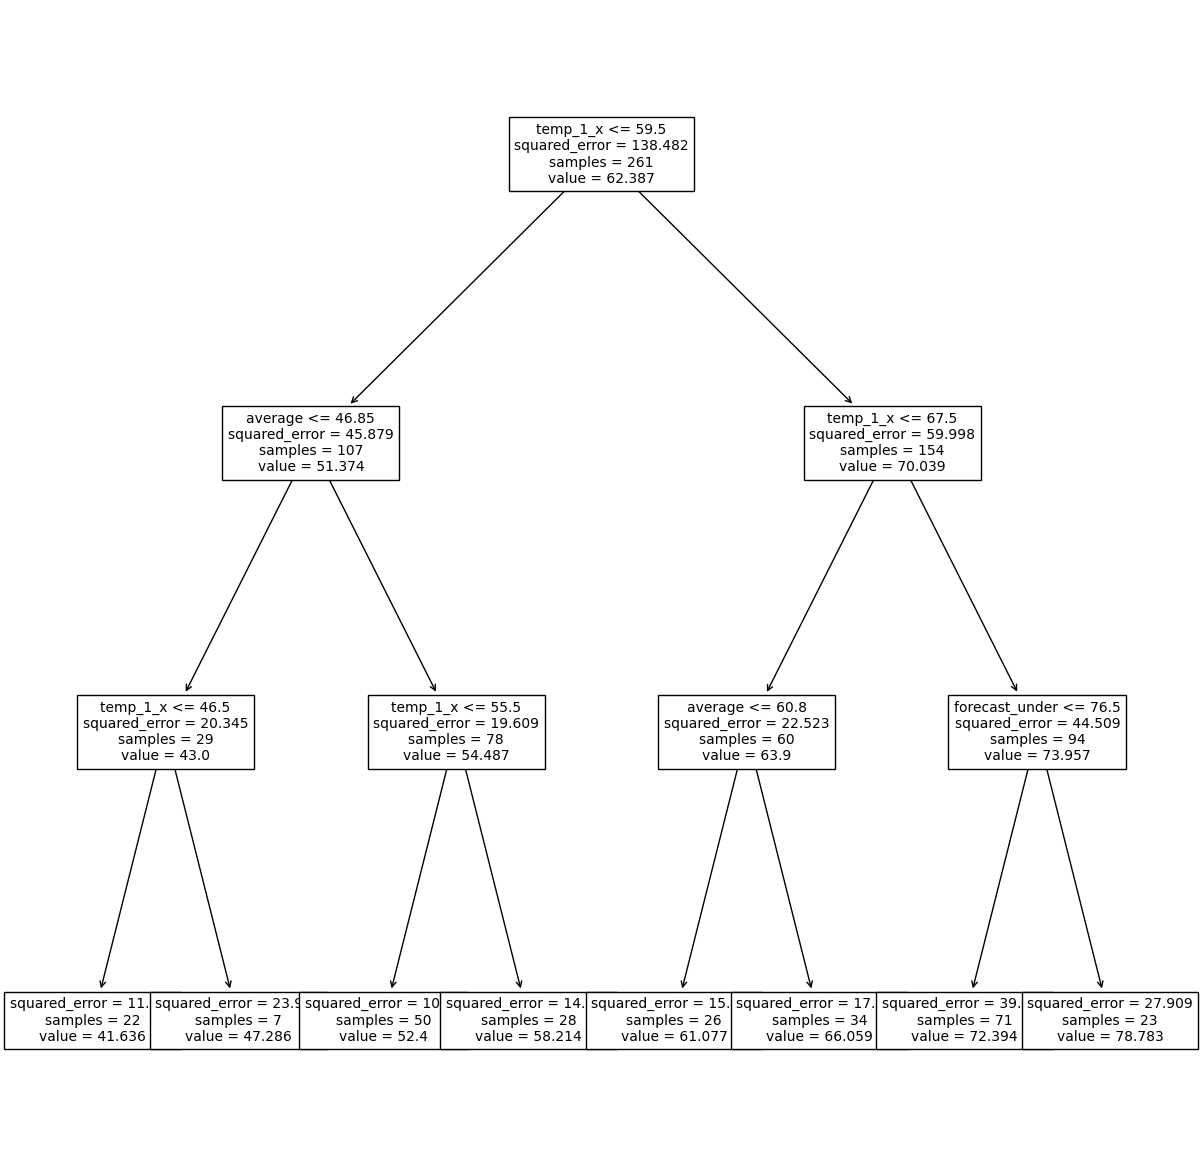

In [366]:
plt.figure(figsize=(15,15))

plot_tree(dtr_3, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [367]:
feature_importances = pd.Series(dtr_3.feature_importances_)
feature_importances.sort_values(ascending=False)

4     0.872637
5     0.103995
8     0.023367
0     0.000000
11    0.000000
16    0.000000
15    0.000000
14    0.000000
13    0.000000
12    0.000000
9     0.000000
10    0.000000
1     0.000000
7     0.000000
6     0.000000
3     0.000000
2     0.000000
17    0.000000
dtype: float64

In [368]:
X_train.columns

Index(['year', 'month', 'day', 'temp_2', 'temp_1_x', 'average',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'Fri',
       'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed', 'temp_1_y'],
      dtype='object')

In [369]:
pd.DataFrame({'features':X_train.columns, 'importances':dtr_3.feature_importances_}).sort_values('importances', ascending=False)

,features,importances
4,temp_1_x,0.872637
5,average,0.103995
8,forecast_under,0.023367
0,year,0.000000
11,Mon,0.000000
16,Wed,0.000000
15,Tues,0.000000
14,Thurs,0.000000
13,Sun,0.000000
12,Sat,0.000000


In [370]:
X_train, X_test, y_train, y_test = train_test_split(df[['temp_1_x','average','forecast_under']], df['actual'], test_size=0.2, random_state=42)

In [371]:
dtr_3 = DecisionTreeRegressor(max_depth=3)
dtr_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [372]:
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [70, 87]

### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

<AxesSubplot:>

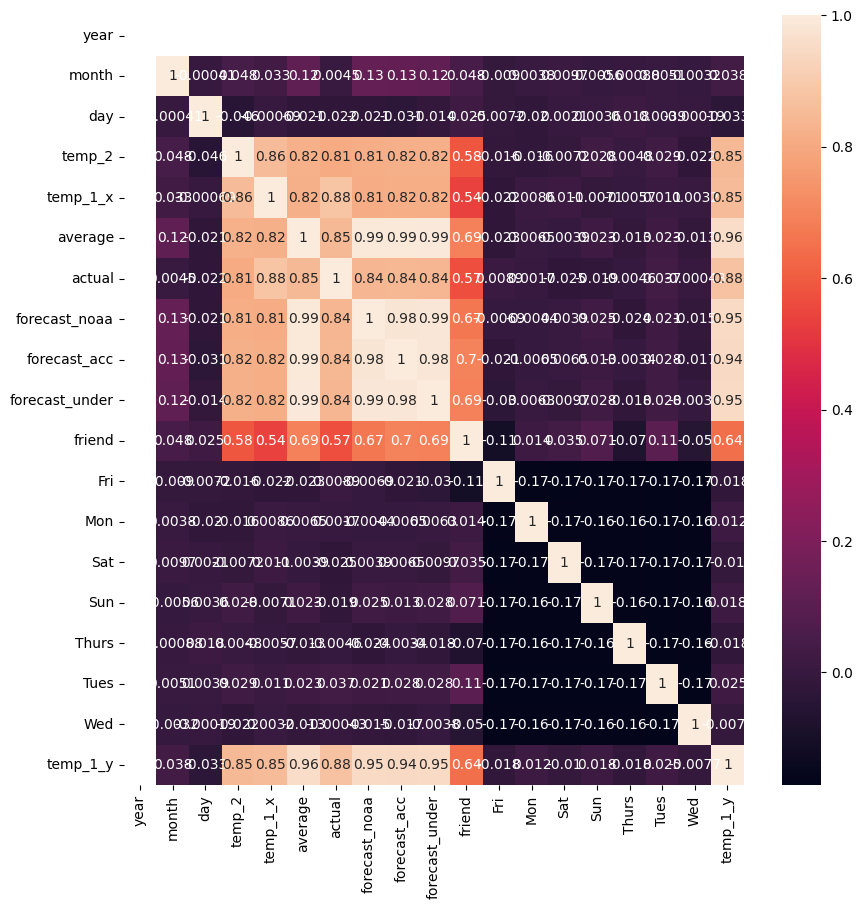

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df['target_clas'].value_counts()

KeyError: 'target_clas'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['year','day','week','actual','target_clas']), df['target_clas'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [ ]:
dtc.feature_importances_

array([0.        , 0.        , 0.08751759, 0.83792502, 0.05793051,
       0.        , 0.01076818, 0.0058587 , 0.        ])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,dtc.predict(X_test))

0.9

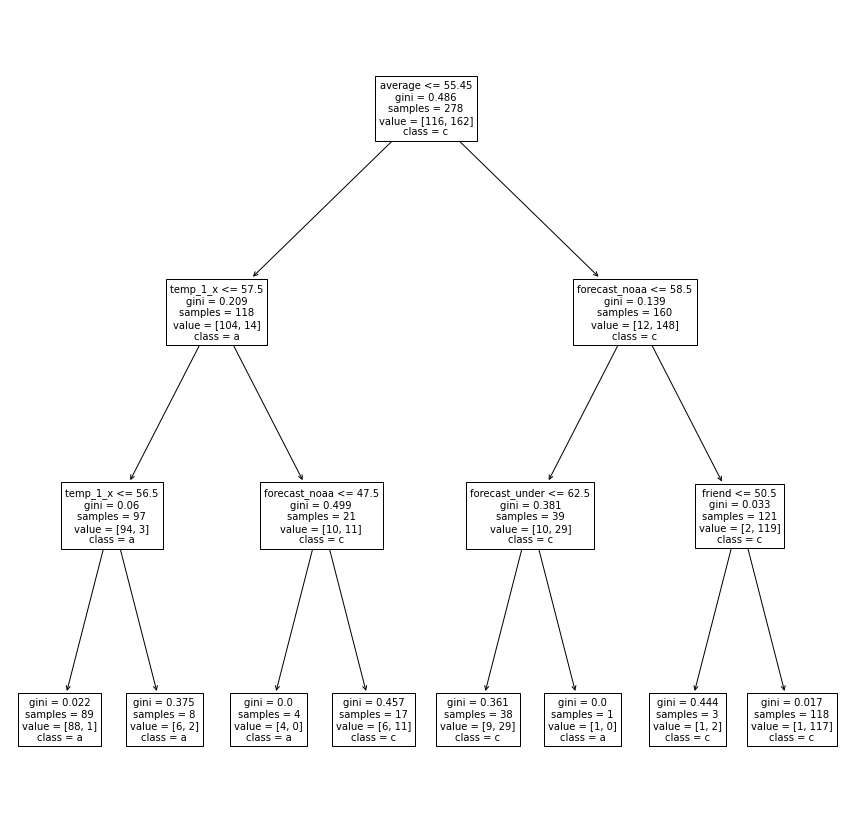

In [ ]:
plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

accuracy_score(y_test,lr.predict(X_test))

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8428571428571429

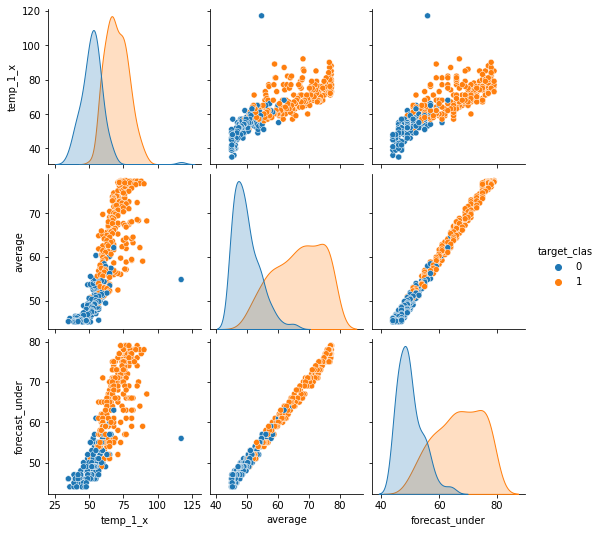

In [ ]:
sns.pairplot(df[['temp_1_x','average','forecast_under','target_clas']], hue='target_clas')